# Image Compression Using K-Means Clustering

## Importing Modules

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Loading The Image

In [12]:
org_image = Image.open('oxlac.png', 'r')
pixels = list(org_image.getdata())
final_pixels = np.array([np.array(p) for p in pixels])

# Applying KMeans

In [14]:
kmeans = KMeans(n_clusters=30, init='k-means++', n_init=10, max_iter=20)
y_kmeans = kmeans.fit_predict(final_pixels)

## Calculate Silhouette Coefficient


In [16]:
silhouette_avg = silhouette_score(final_pixels, y_kmeans)
print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.8947537348388861


## Reshaping it for Column*Rows


In [17]:
ykmeans = np.reshape(y_kmeans, (org_image.size[1], org_image.size[0]))
centroids = kmeans.cluster_centers_

## Plotting the compressed image clusters

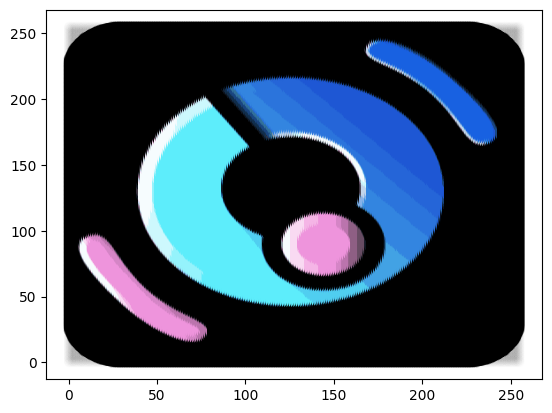

In [18]:
X = np.arange(0, org_image.size[0])
for y in range(0, org_image.size[1]):
    plt.scatter(np.full((1, org_image.size[0]), y)[0], X, c=kmeans.cluster_centers_[ykmeans[y][X]] / 255)
plt.show()

## Calculate Sum of Squared Errors (SSE)


In [19]:
sse = kmeans.inertia_
print("Sum of Squared Errors (Inertia):", sse)

Sum of Squared Errors (Inertia): 2242530.542323718
